**CNN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio.csv


In [4]:
data = pd.read_csv("cardio.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


<ipython-input-8-18ea7d0703b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=data, palette="bwr")


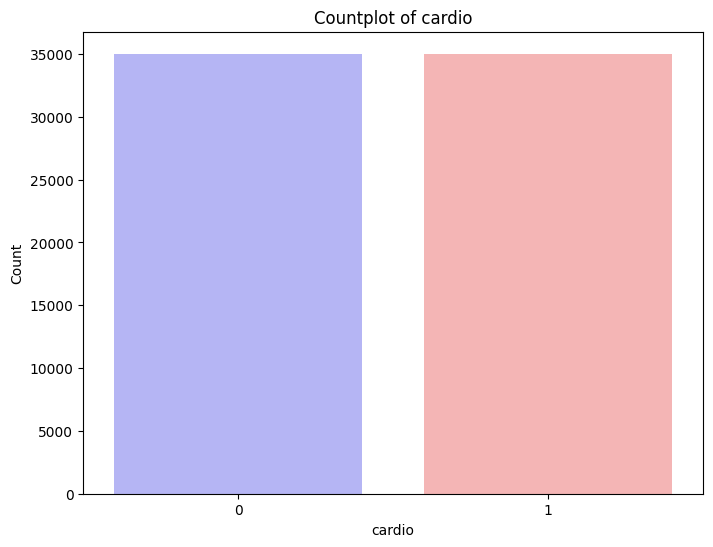

In [8]:
plt.figure(figsize=(8, 6))  # Adjust figsize as needed
sns.countplot(x='cardio', data=data, palette="bwr")
plt.title('Countplot of cardio')
plt.xlabel('cardio')
plt.ylabel('Count')

# Display the plot
plt.show()

In [9]:
X = data.drop('cardio', axis=1).to_numpy()
y = data['cardio'].to_numpy()

In [10]:
X.shape, y.shape

((70000, 12), (70000,))

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train_vaild, X_test, y_train_vaild, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train_vaild.shape, X_test.shape, y_train_vaild.shape, y_test.shape

((59500, 12), (10500, 12), (59500,), (10500,))

In [13]:
tf.random.set_seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_vaild, y_train_vaild, test_size=0.20, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((47600, 12), (11900, 12), (47600,), (11900,))

In [14]:
# let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
# Changed input_dim to 12 to match the actual number of features in X_train
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(3, input_dim=12, activation='relu'), # Fixed input_dim
           tf.keras.layers.Dense(3, activation='relu'),
           tf.keras.layers.Dense(4, activation='relu'),
           tf.keras.layers.Dense(2, activation='softmax')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train,
                      tf.one_hot(y_train, depth=2),
                      epochs=100,
                      verbose = 1,
                      validation_data=(X_valid, tf.one_hot(y_valid, depth=2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5496 - loss: 0.6965 - val_accuracy: 0.6666 - val_loss: 0.6130
Epoch 2/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6732 - loss: 0.6097 - val_accuracy: 0.7150 - val_loss: 0.5720
Epoch 3/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7120 - loss: 0.5766 - val_accuracy: 0.7309 - val_loss: 0.5535
Epoch 4/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7220 - loss: 0.5668 - val_accuracy: 0.7313 - val_loss: 0.5507
Epoch 5/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7224 - loss: 0.5635 - val_accuracy: 0.7327 - val_loss: 0.5495
Epoch 6/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7223 - loss: 0.5619 - val_accuracy: 0.7334 - val_loss: 0.5486
Epoch 7/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7223 - loss: 0.5604 - val_accuracy: 0.7338 - val_loss: 0.5477
Epoch 8/100
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7224 - loss:

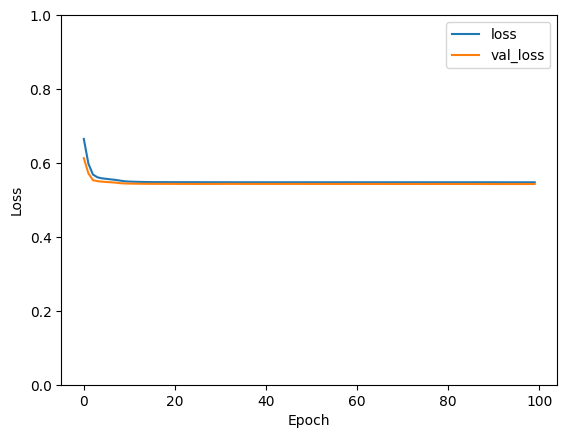

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


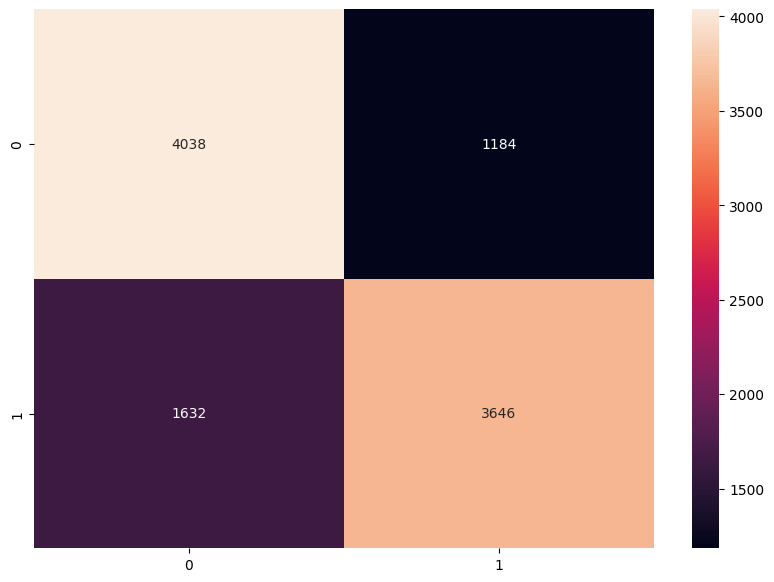

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_true=y_test,
                 y_pred=model_1.predict(X_test).argmax(axis=1)), annot=True,
                 fmt="d");

In [17]:
model_1.evaluate(X_test, tf.one_hot(y_test, depth=2))[1] * 100

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7386 - loss: 0.5391


73.18094968795776

In [18]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            39 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233 (936.00 B)

 Trainable params: 77 (308.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156 (628.00 B)

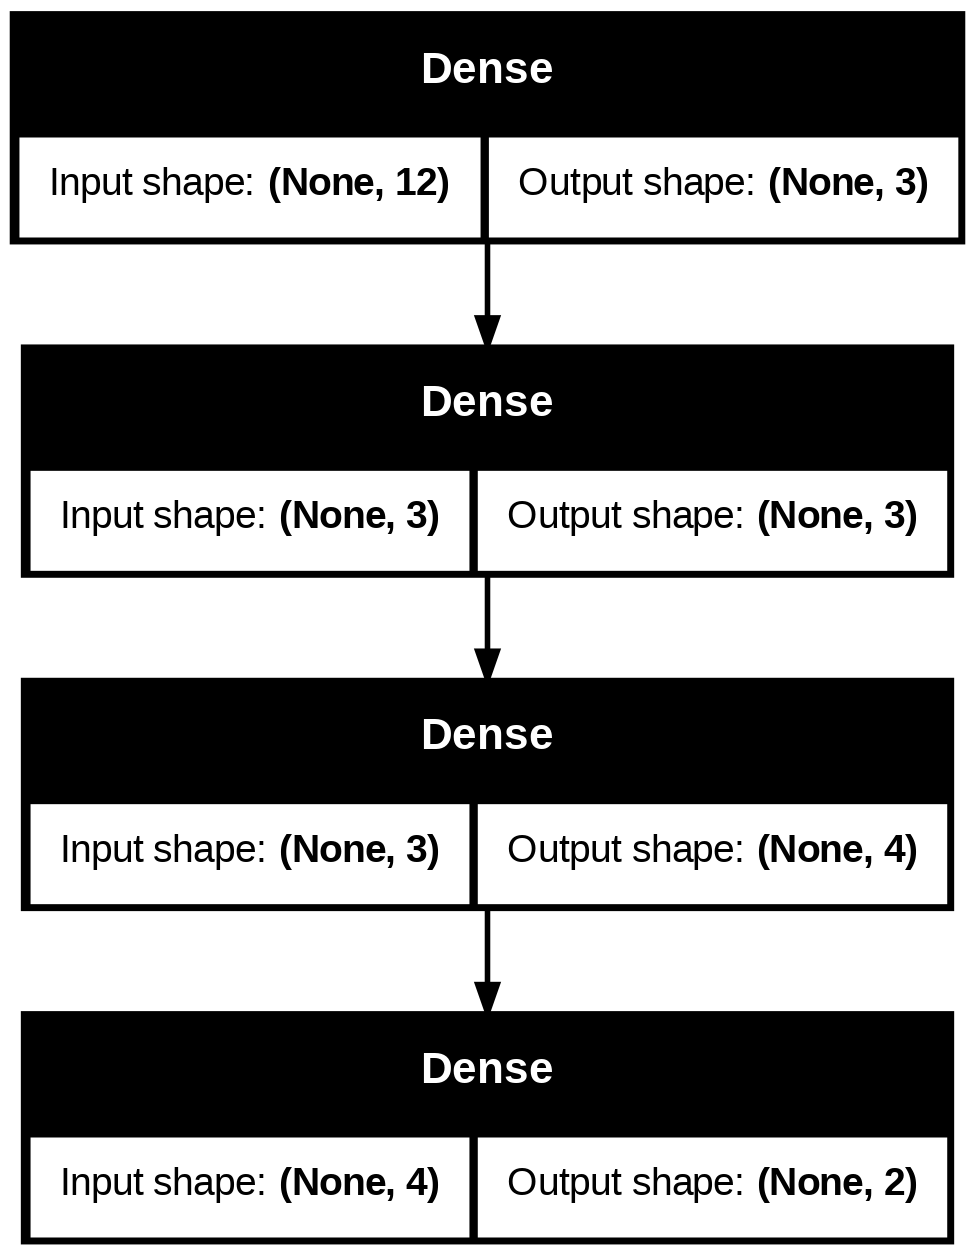

In [19]:
# Let's check out a way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_1, show_shapes=True)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import joblib

# 1. Load dataset
df = pd.read_csv("cardio.csv")

# 2. Select features + target
features = [
    'age', 'height', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    'gender'
]
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
features.append('bmi')

X = df[features]
y = df['cardio']

# 3. Scale input
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reshape for Conv1D: (samples, steps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build model (with best GA-found hyperparameters)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(12, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 8. Save model and scaler
model.save("model_conv1d.h5")
joblib.dump(scaler, "scaler.pkl")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6595 - loss: 0.6183 - val_accuracy: 0.7095 - val_loss: 0.5733
Epoch 2/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7193 - loss: 0.5645 - val_accuracy: 0.7298 - val_loss: 0.5593
Epoch 3/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7256 - loss: 0.5574 - val_accuracy: 0.7325 - val_loss: 0.5546
Epoch 4/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7275 - loss: 0.5536 - val_accuracy: 0.7340 - val_loss: 0.5518
Epoch 5/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7301 - loss: 0.5505 - val_accuracy: 0.7354 - val_loss: 0.5489
Epoch 6/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7305 - loss: 0.5488 - val_accuracy: 0.7358 - val_loss: 0.5473
Epoch 7/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7320 - loss: 0.5479 - val_accuracy: 0.7356 - val_loss: 0.5460
Epoch 8/30
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7312 - loss: 0.5466 - val_accur

['scaler.pkl']

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7469 - loss: 0.5363
Final Test Accuracy: 73.81%
